# Project 1: Regression

This project asks you to perform various experiments with regression. The dataset we are using is taken from a real estate dataset:

https://www.kaggle.com/datasets/mirbektoktogaraev/madrid-real-estate-market

The objective of this project is to become familiar with the underlying techniques of machine learning, and implement some of the techniques yourself. 

You will write code and discussion texts into code and text cells in this notebook. 

If a block starts with TODO:, this means that you need to write something there. 

Some code had been written for you to guide the project. Don't change the already written code.




In [25]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import time
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Setup for  the project

For problems P1 to P5 we are using a simple dataset where we extract one 
explanatory variable ``sq_mt_built`` to predict the price of the house ``buy_price``

In [26]:
df = pd.read_csv("houses_Madrid.csv")
print(f"The length {len(df.index)}")
print(f"The columns of the database {df.columns}")
df[["sq_mt_built", "buy_price"]].plot.scatter(x="sq_mt_built", y="buy_price")
df = df[["sq_mt_built", "buy_price"]].fillna(False)
## FIXME: add here the creation of the training data and test data

# the training and test data was already implemented in the next cell but im guessing you meant use a train_test_split()

df_shuffled = df.sample(frac=1) # shuffle the rows

# X = df_shuffled["sq_mt_built"].to_numpy(dtype=np.float64)
# y = df_shuffled["buy_price"].to_numpy(dtype=np.float64)
# training_data_x, test_data_x, training_data_y, test_data_y = train_test_split(X, y, test_size=0.2, random_state=42)

The length 21742
The columns of the database Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude',
       'longitude', 'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',


KeyboardInterrupt: 

In [ ]:
x = df_shuffled["sq_mt_built"].to_numpy(dtype=np.float64)
y = df_shuffled["buy_price"].to_numpy(dtype=np.float64)
training_data_x = x[:16000]
training_data_y = y[:16000]
test_data_x = x[16000:]
test_data_y = y[16000:]

training_data_x.shape, training_data_y.shape, test_data_x.shape, test_data_y.shape

((16000,), (16000,), (5742,), (5742,))

In [ ]:
training_data_y

array([ 850000.,  660000., 1023000., ...,  359900.,  449000.,  379900.])

## P1: Loss function (10 pts)
Implement a root-mean-square error (RMSE) loss function between the prediction $\hat{y}$ and $y$ value using Python operations. Run some experiments to validate that this works as expected. 
Then, look up the same in the sklearn library
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
and implement it based on what is there. 

In [ ]:
# TODO: implement the loss function here using Python math ops and sklearn
def loss_RMSE(y, yhat):
    return np.sqrt(np.sum((y - yhat) ** 2) / y.shape[0])

def loss_RMSE_sk(y, yhat):
    return root_mean_squared_error(y, yhat)

In [ ]:
# TODO: Now, run some experiments with your function, with the one taken with sklearn 
# Compare their outputs.

for _ in range(3):
    test_y = np.random.rand(20)
    test_yhat = np.random.rand(20)
    a = loss_RMSE(test_y, test_yhat)
    b = loss_RMSE_sk(test_y, test_yhat)

    print(f"My RMSE loss function: {a}")
    print(f"Scikit-Learn RMSE loss function: {b}")
    print(f"Equal: {a == b}\n")

My RMSE loss function: 0.37883214664778003
Scikit-Learn RMSE loss function: 0.37883214664778003
Equal: True

My RMSE loss function: 0.35798840246179564
Scikit-Learn RMSE loss function: 0.35798840246179564
Equal: True

My RMSE loss function: 0.3673295042313345
Scikit-Learn RMSE loss function: 0.3673295042313345
Equal: True



## P2: Implement a linear predictor (10 pts)
Implement a function of type ``predict(x, theta) --> y_hat`` which implements a linear model of the type $\hat{y} = \theta_1 \cdot x + \theta_0$

In [ ]:
# TODO: implement the predictor function here
def predict(x, theta):
    return theta[1] * x + theta[0]

In [ ]:
# TODO: now, run some experiments with it

for _ in range(3):
    # used randint to make it easier to review
    theta = np.random.randint(1, 10, 2)
    test_x = np.random.randint(0, 100, 3)
    test_y = predict(test_x, theta)

    print(f"Parameters: {theta}")
    print(f"Input x: {test_x}")
    print(f"Output y: {test_y}\n")

Parameters: [1 1]
Input x: [76 61 60]
Output y: [77 62 61]

Parameters: [4 4]
Input x: [64  0 94]
Output y: [260   4 380]

Parameters: [1 5]
Input x: [46 97 65]
Output y: [231 486 326]



## P3: Implement a "grid search" function (20 pts)
Implement a function grid_search() which returns an estimate of the best $\theta$ by trying out all the combinations of possibilities on a grid and returning the values that give you the most values. 
gridx and gridy define the range of numbers that we want to explore. For instance, grid0 might be [0, 0.25, 0.5, 0.75, 1.0] 

In [ ]:
# TODO: implement the grid search function here 
def grid_search(training_data_x, training_data_y, grid0, grid1):
    thetas = np.meshgrid(grid0, grid1)
    theta_pairs = np.stack(thetas, axis=-1)
    loss = np.apply_along_axis(lambda theta: loss_RMSE(training_data_y, predict(training_data_x, theta)), 2, theta_pairs)
    
    best_idx = np.unravel_index(np.argmin(loss), loss.shape)
    return [thetas[0][best_idx], thetas[1][best_idx]]
    
# grid_search(training_data_x, training_data_y, np.array([0, 0.25, 0.5, 0.75, 1.0]), np.array([0, 0.25, 0.5, 0.75, 1.0]))
# grid_search(np.array([2, 4, 6]), np.array([2, 4, 6]), np.array([0, 0.25, 0.5, 0.75, 1.0]), np.array([0, 0.25, 0.5, 0.75, 1.0]))

In [ ]:
# TODO: run some experiments with grid_search
# Define some grid values. Train it on the data set. Test it on the test set. 
# Print the loss on the data set and the test set. Measure and print how long the training takes.

def eval(theta):
    train_loss = loss_RMSE(training_data_y, predict(training_data_x, theta))
    test_loss = loss_RMSE(test_data_y, predict(test_data_x, theta))

    print(f"Best parameters: {theta}")
    print(f"Train Loss: {train_loss} | Test Loss: {test_loss}")
    print(f"Training Time: {train_time}")

    return test_loss

grid0 = np.linspace(-5000, 10000, 51)
grid1 = np.linspace(0, 10000, 51)

start_time = time.time()
grid_search_theta = grid_search(training_data_x, training_data_y, grid0, grid1)
end_time = time.time()
train_time = end_time - start_time

grid_search_loss = eval(grid_search_theta);

Best parameters: [10000.0, 4400.0]
Train Loss: 513007.3032687295 | Test Loss: 489598.39780057577
Training Time: 0.12909793853759766


In [ ]:
# TODO: repeat the experimentation from above with different grids. 
# Finally, print the grid that provides the best value while still running faster 
# than 10 seconds.

grid0 = np.linspace(0, 9500, 101)
grid1 = np.linspace(4400, 4500, 101)

start_time = time.time()
grid_search_theta = grid_search(training_data_x, training_data_y, grid0, grid1)
end_time = time.time()
train_time = end_time - start_time

eval(grid_search_theta);

Best parameters: [9500.0, 4419.0]
Train Loss: 512997.1461786491 | Test Loss: 489559.8761533822
Training Time: 0.4400472640991211


## P4: Implement a random search function (20 pts)
Implement a function that returns the estimate for the best $\theta$ by trying out random 
$\theta=[\theta_0, \theta_1]$ values, and returning the one that minimizes the error on the training set passed to it. The number of tries is described in the ``trials`` parameter.

In [ ]:
# TODO: implement the random search function here 
def random(training_data_x, training_data_y, trials):
    thetas = np.random.uniform(0, 10000, (trials, 2))
    loss = np.apply_along_axis(lambda theta: loss_RMSE(training_data_y, predict(training_data_x, theta)), 1, thetas)
    
    best_idx = np.argmin(loss)
    return thetas[best_idx]

In [ ]:
# TODO: run some experiments with random_search
# Choose some value for trial. Train it on the data set. Test it on the test set. 
# Print the loss on the data set and the test set. Measure and print how long the training takes.

trials = 3000

start_time = time.time()
random_search_theta = random(training_data_x, training_data_y, trials)
end_time = time.time()
train_time = end_time - start_time

random_search_loss = eval(random_search_theta)

Best parameters: [9756.20627866 4419.41301437]
Train Loss: 512996.69355062686 | Test Loss: 489563.66952502646
Training Time: 0.14556550979614258


## P5: Using the sklearn library (40 pts)

Use ``sklearn.linear_model.LinearRegression`` to solve the same problem you previously solved using the grid search and random search.

Compare the returned values with what you have achieved. Compare the parameters that had been found to the parameters you have found. Compare the speed. 

In [ ]:
# TODO: Implement here
model = LinearRegression()

start_time = time.time()
model.fit(training_data_x.reshape(-1, 1), training_data_y)
end_time = time.time()
train_time = end_time - start_time

sklearn_theta = [model.intercept_, model.coef_[0]]
sklearn_loss = eval(sklearn_theta)

Best parameters: [11978.477134505985, 4409.690839178104]
Train Loss: 512994.402565994 | Test Loss: 489611.5440268454
Training Time: 0.02000117301940918


In [ ]:
# TODO: Run performance experiments here. 
print('Grid Search:')
print(f'Loss: {grid_search_loss}')
print(f'Parameters: {grid_search_theta}\n')
print('Random Search:')
print(f'Loss: {random_search_loss}')
print(f'Parameters: {random_search_theta}\n')
print('Scikit-Learn Linear Regression:')
print(f'Loss: {sklearn_loss}')
print(f'Parameters: {sklearn_theta}\n')

x, y = test_data_x[0], test_data_y[0]
grid_search_pred = predict(x, grid_search_theta)
random_search_pred = predict(x, random_search_theta)
sklearn_pred = predict(x, sklearn_theta)

print(f'Input: {x}')
print(f'Grid Search Output: {grid_search_pred}')
print(f'Random Search Output: {random_search_pred}')
print(f'Scikit-Learn Linear Regression: {sklearn_pred}')
print(f'Ground Truth Output: {y}')

Grid Search:
Loss: 489598.39780057577
Parameters: [9500.0, 4419.0]

Random Search:
Loss: 489563.66952502646
Parameters: [9756.20627866 4419.41301437]

Scikit-Learn Linear Regression Model:
Loss: 489611.5440268454
Parameters: [11978.477134505985, 4409.690839178104]

Input: 70.0
Grid Search Output: 318830.0
Random Search Output: 319115.1172843117
Scikit-Learn Linear Regression Model: 320656.8358769733
Ground Truth Output: 130000.0


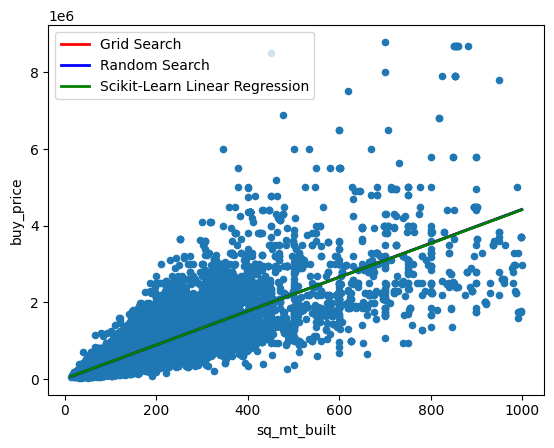

In [32]:
import matplotlib.pyplot as plt

x = np.linspace(df["sq_mt_built"].min(), df["sq_mt_built"].max(), 2)
grid_search_y = grid_search_theta[1] * x + grid_search_theta[0]
random_search_y = random_search_theta[1] * x + random_search_theta[0]
sklearn_y = sklearn_theta[1] * x + sklearn_theta[0]
df[["sq_mt_built", "buy_price"]].plot.scatter(x="sq_mt_built", y="buy_price")
plt.plot(x, grid_search_y, color='red', linewidth=2, label="Grid Search")
plt.plot(x, random_search_y, color='blue', linewidth=2, label="Random Search")
plt.plot(x, sklearn_y, color='green', linewidth=2, label="Scikit-Learn Linear Regression")
plt.legend();

TODO: discuss the performance of the sklearn library implementation, compared to what you implemented.

Grid or random searches require a range, where a larger range can cover more values but will either require more computation to have the same precision or will lose precision. For this dataset, the intercept of the best fit line has high variance so depending on the dataset shuffle, the best intercept can be anywhere around the range [-2000, 13000]. The sklearn library implementation can handle that range faster and with more precision than a grid or random search. 